# **💹🚀 PIB | Analyse intra-processus**
---



Après avoir analysé de façon **inter-processus** les liens entre les PIB de différents pays, nous pouvons enrichir notre analyse avec une analyse **intra-processus** sur 2 pays : les Etats-Unis et l'Allemagne. 

Pour choisir les pays à analyser, nous avons utilisé une matrice de corrélation et nous avons choisit 2 pays qui ne sont à priori pas corrélés (coefficient de corrélation le moins élevé de la matrice avec 0.87 en-dehors de l'Inde). 

Pour l'ensemble de nos 5 pays, nous avons **la matrice de corrélation** suivante : 


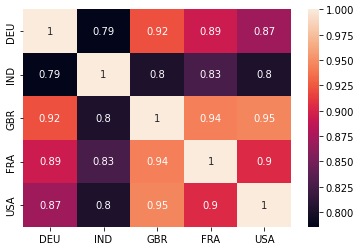

**Nous** pouvons observer que le pays qui représente le moins de corrélation avec les autres est l'Inde, ce qui s'explique par le fait que c'est un pays en développement, donc l'évolution de son PIB n'est pas la même que celle de pays développés comme le sont le reste des pays de notre matrice. 

De ce fait, l'utilisation de l'Inde aurait été le plus pertinent. Cependant, dans notre jeu de données, les données sont manquante pour l'ensemble de la période. 

Pour l'ensemble de notre étude, nous allons utiliser un nouveau jeu de données : le volume du PIB des USA et de l'Allemagne, du premier trimestre de 2000 au troisième trimestre de 2021.


---
🔰 Pour commencer, et dans un soucis de praticité, nous allons réaliser l'ensemble de l'importation des librairies nécessaires au besoin de notre projet : 

In [ ]:
!pip install pmdarima
!pip install --upgrade Cython
!pip install --upgrade git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-0yu3uhka
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-0yu3uhka
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [ ]:
!pip install statsmodels --upgrade

In [ ]:
# Importer les librairies
import math
import pandas as pd
import numpy as np
import pmdarima as pm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import mean_squared_error

---
## **1️⃣ Préparation des données pour le traitement**

🔰 Pour pouvoir traiter l'ensemble des données, nous avons nettoyé le fichier .csv d'origine avant de l'importer dans le notebook.




In [ ]:
!wget = http://caullireau.com/data731/data_volume_USA_DEU.csv
!wget = http://caullireau.com/data731/data_volume_USA_GRB_DEU.csv



data = pd.read_csv("data_volume_USA_DEU.csv")
countries = list(set(data['LOCATION']))
data_countries = {}

--2022-01-12 09:24:28--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-01-12 09:24:28--  http://caullireau.com/data731/data_volume_USA_DEU.csv
Resolving caullireau.com (caullireau.com)... 54.36.91.62
Connecting to caullireau.com (caullireau.com)|54.36.91.62|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://caullireau.com/data731/data_volume_USA_DEU.csv [following]
--2022-01-12 09:24:30--  https://caullireau.com/data731/data_volume_USA_DEU.csv
Connecting to caullireau.com (caullireau.com)|54.36.91.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8952 (8.7K) [text/csv]
Saving to: ‘data_volume_USA_DEU.csv.1’

data_volume_USA_DEU 100%[===================>]   8.74K  --.-KB/s    in 0s      

2022-01-12 09:24:31 (119 MB/s) - ‘data_volume_USA_DEU.csv.1’ saved [8952/8952]

FINISHED --2022-01-12 09:24:31--
Total wall clock time: 2.2s
Downloaded: 1 files, 8.7K in 0s (1

---
### **2️⃣ Visualisation des données**

🔰 Après avoir importé le dataset, nous allons dans un premier temps faire une première visualisation des données pour comprendre rapidement la représentation de ces données. Nous allons afficher la moyenne mobile et la variance afin de débuter notre analyse. 


In [ ]:
for country in countries:
  data_country = data.loc[data['LOCATION']==country,:].copy()
  data_country.is_copy = False
  variance = data_country.rolling(4,min_periods=2).std()
  moyenneMobile = data_country.rolling(3,min_periods=2).mean()
  data_country['Variance'], data_country['MoyenneMobile'] = [variance, moyenneMobile]

  data_countries[country] = data_country



🔰 Nous pouvons alors voir et comparer l'évolution du PIB depuis le deuxième trimestre de 1999. 

Globalement, nous pouvons voir une évolution à la hausse, avec des pics présent à la fois sur le modèle américain et sur le modèle allemand. 

Dans la suite de ce TP, nous analyseron ces pics ainsi que les évolutions de ce PIB.  

---
### **3️⃣ Stationnarité - Moyenne mobile et Variance**

🔰 Nous allons maintenant déterminer la moyenne mobile et la variance afin de déterminer si notre processus est stationnaire ou non. 

Pour rappel, la stationnarité est déterminer de niveau 1 et niveau 2 par les paramètres suivants :      

```
Stationnarité de niveau 1 :      
  - Moyenne constante 

Stationnarité de niveau 2 :      
  - Moyenne constante 
  - Variance constante
```   

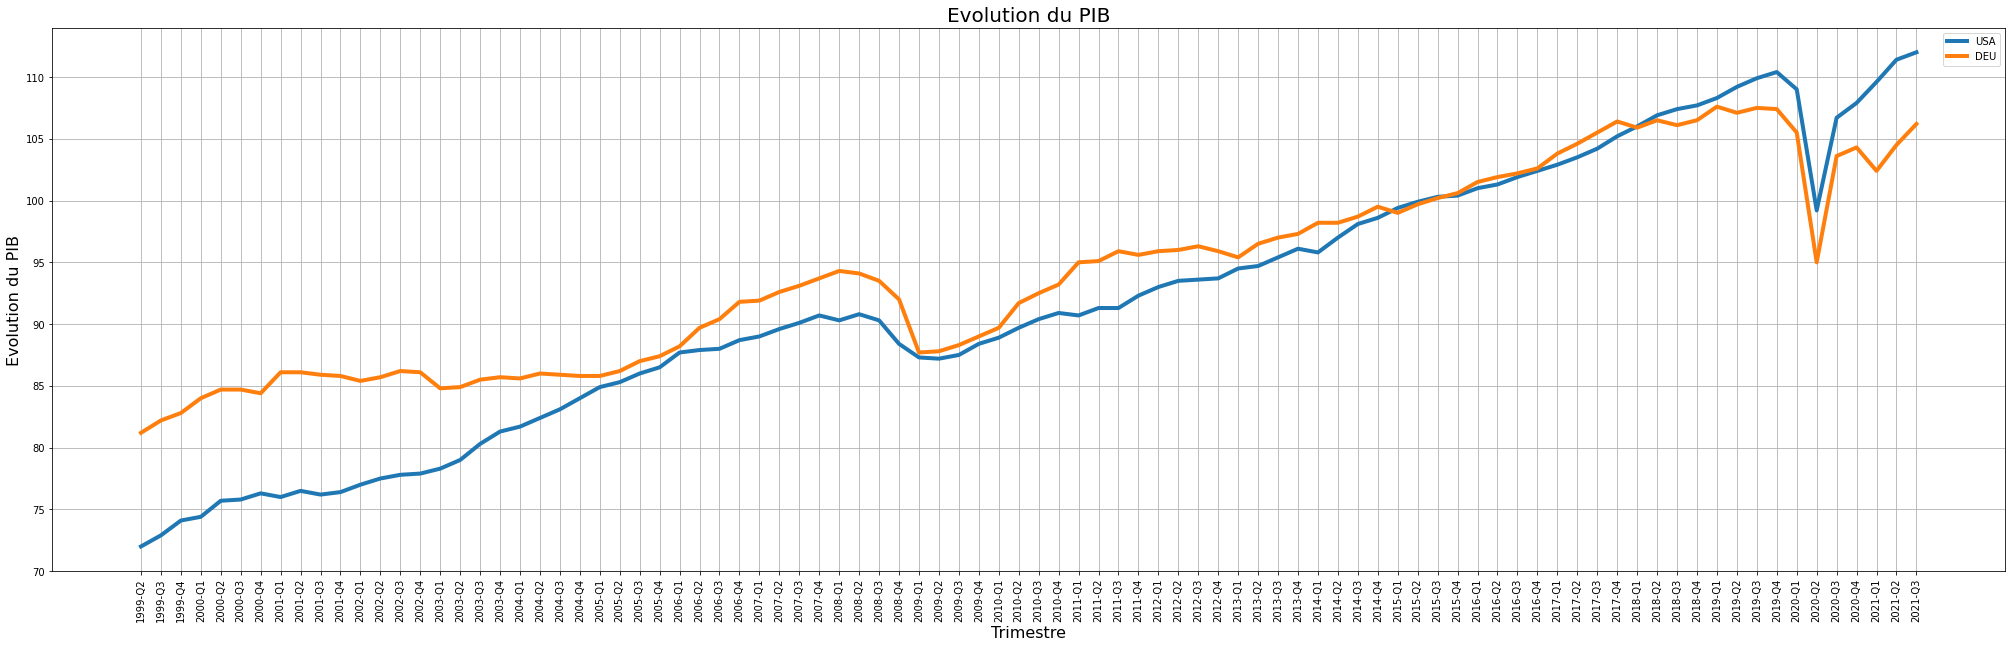

In [ ]:
plt.figure(figsize=(35,10))

for country in countries:
  plt.plot(data_countries[country]["TIME"], data_countries[country]["Value"], linewidth=4, markersize=10, label=country)

plt.xlabel('Trimestre', fontsize=16)
plt.ylabel('Evolution du PIB', fontsize=16)
plt.tick_params(axis ='x', rotation = 90)

plt.title('Evolution du PIB', fontsize=20)
plt.legend()
plt.grid()
plt.show()

Nous avons alors la représentation suivante :  

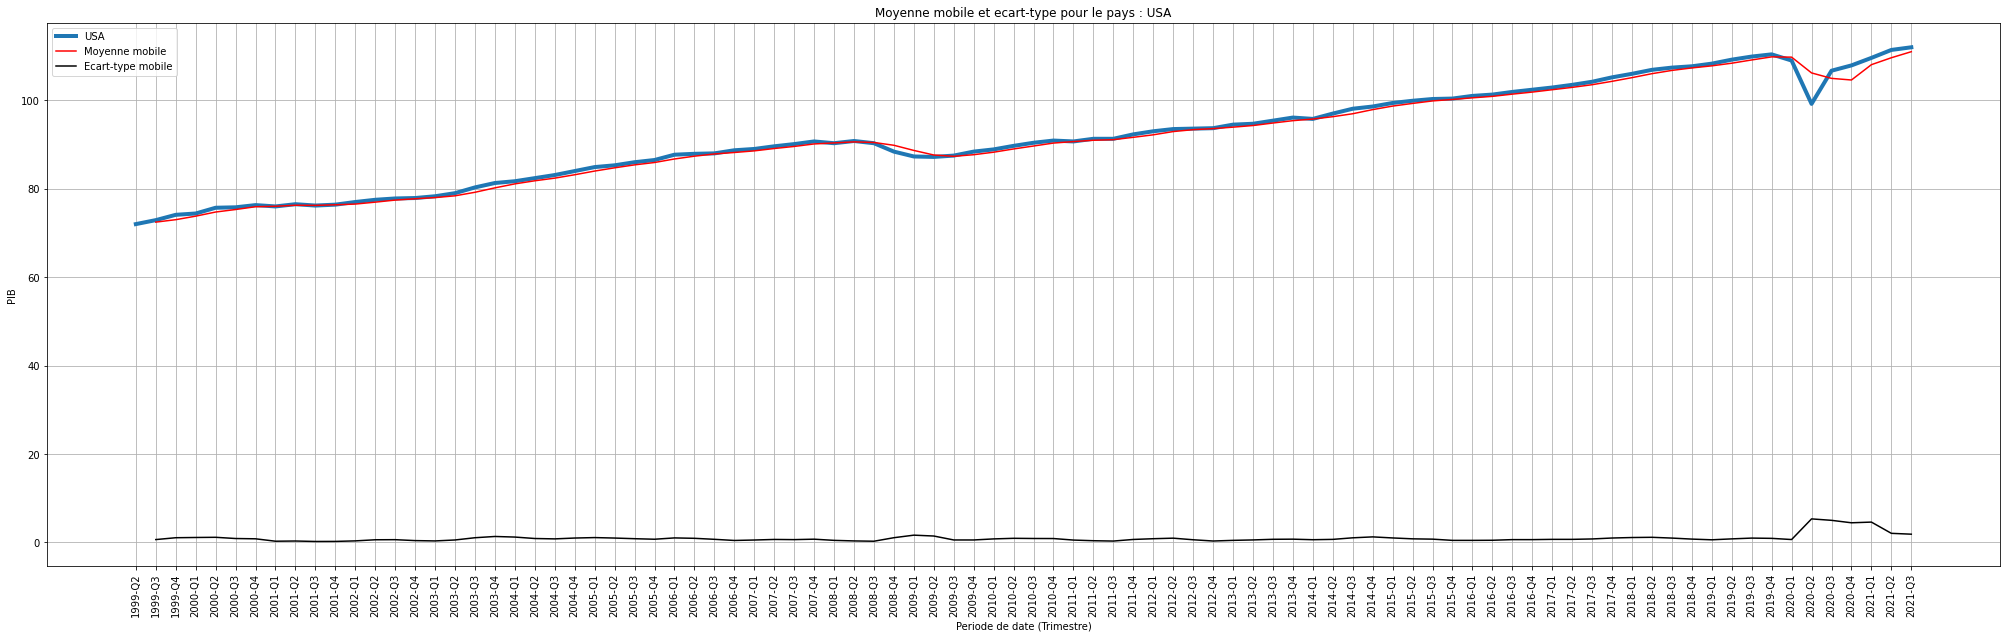

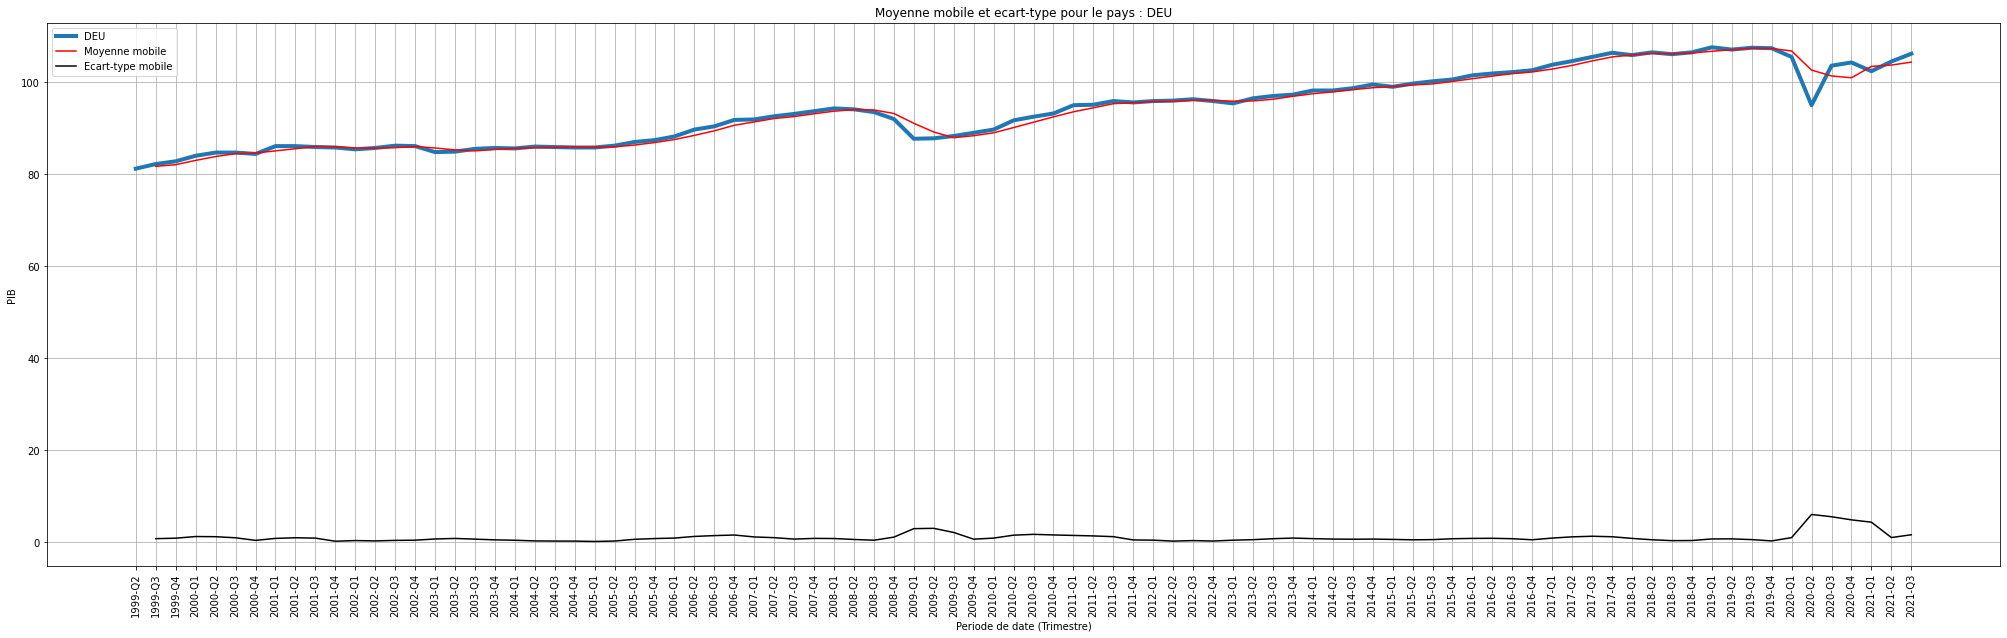

In [ ]:
for country in countries:
  plt.figure(figsize=(35,10))
  
  plt.plot(data_countries[country]["TIME"], data_countries[country]["Value"], linewidth=4, markersize=10, label=country)
  plt.plot(data_countries[country]["TIME"], data_countries[country]["MoyenneMobile"], color='red', label='Moyenne mobile')
  plt.plot(data_countries[country]["TIME"], data_countries[country]["Variance"], color='black', label='Ecart-type mobile')

  plt.xlabel('Periode de date (Trimestre)')
  plt.ylabel('PIB')
  plt.tick_params(axis ='x', rotation = 90)

  plt.title('Moyenne mobile et ecart-type pour le pays : ' + country)
  plt.legend()
  plt.grid()
  plt.show()

🔰 On constate que la variance peut s'approximer à une constante indépendante du temps. Cependant, on remarque de légères fluctuations de la moyenne au cours du temps.

Pour atténuer ces fluctuations, on effectue un traitement de nos données avec un logarithme afin de "lisser" notre courbe et d'avoir un meilleur caractère stationnaire.

---
### **4️⃣ Même étape mais avec attenuation avec log**

🔰 Nous allons donc établir une attenuation de nos données avec la fonction logarithmique.

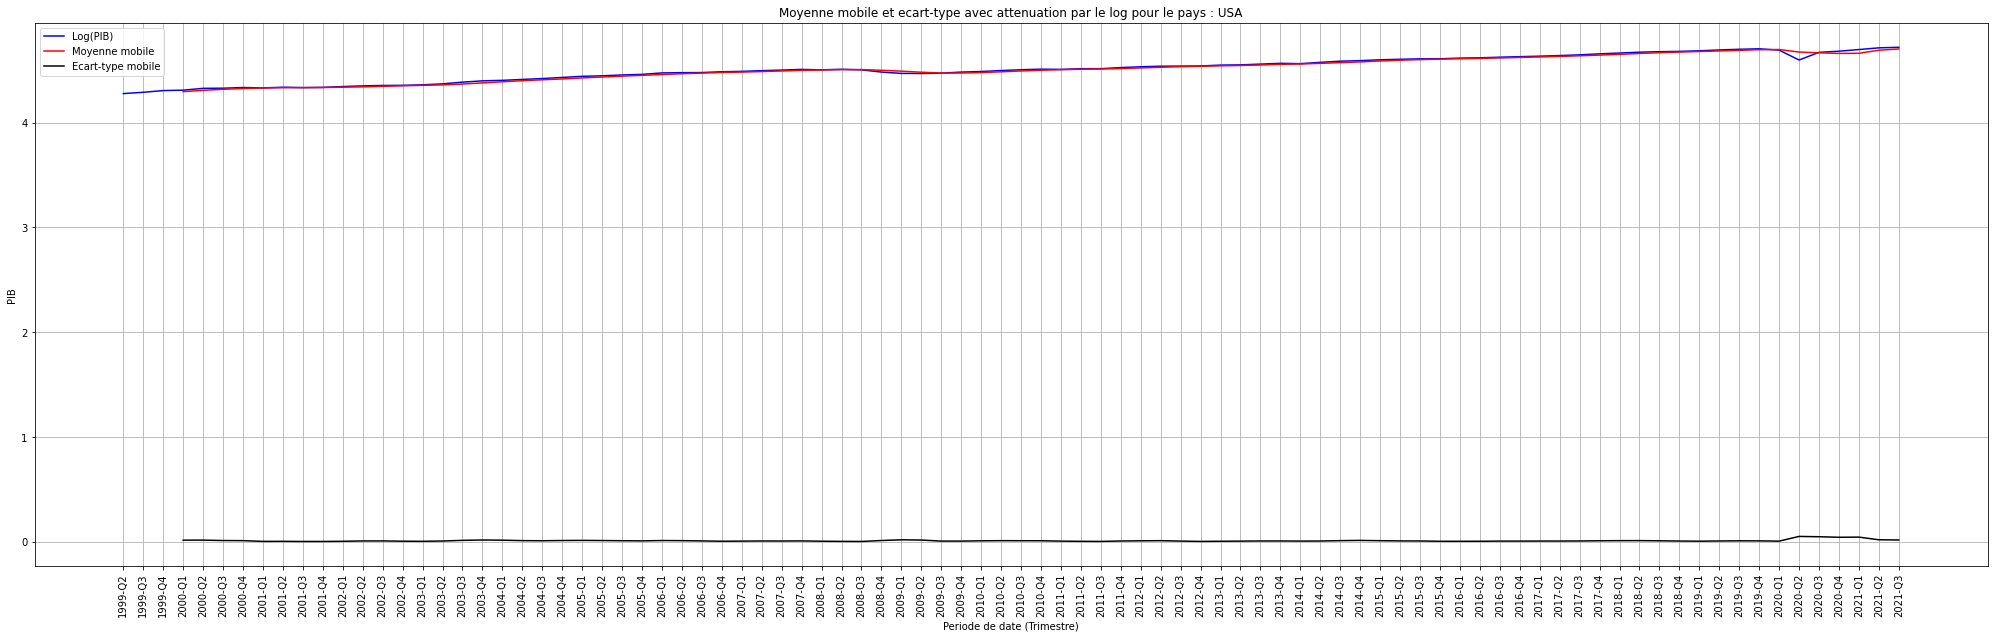

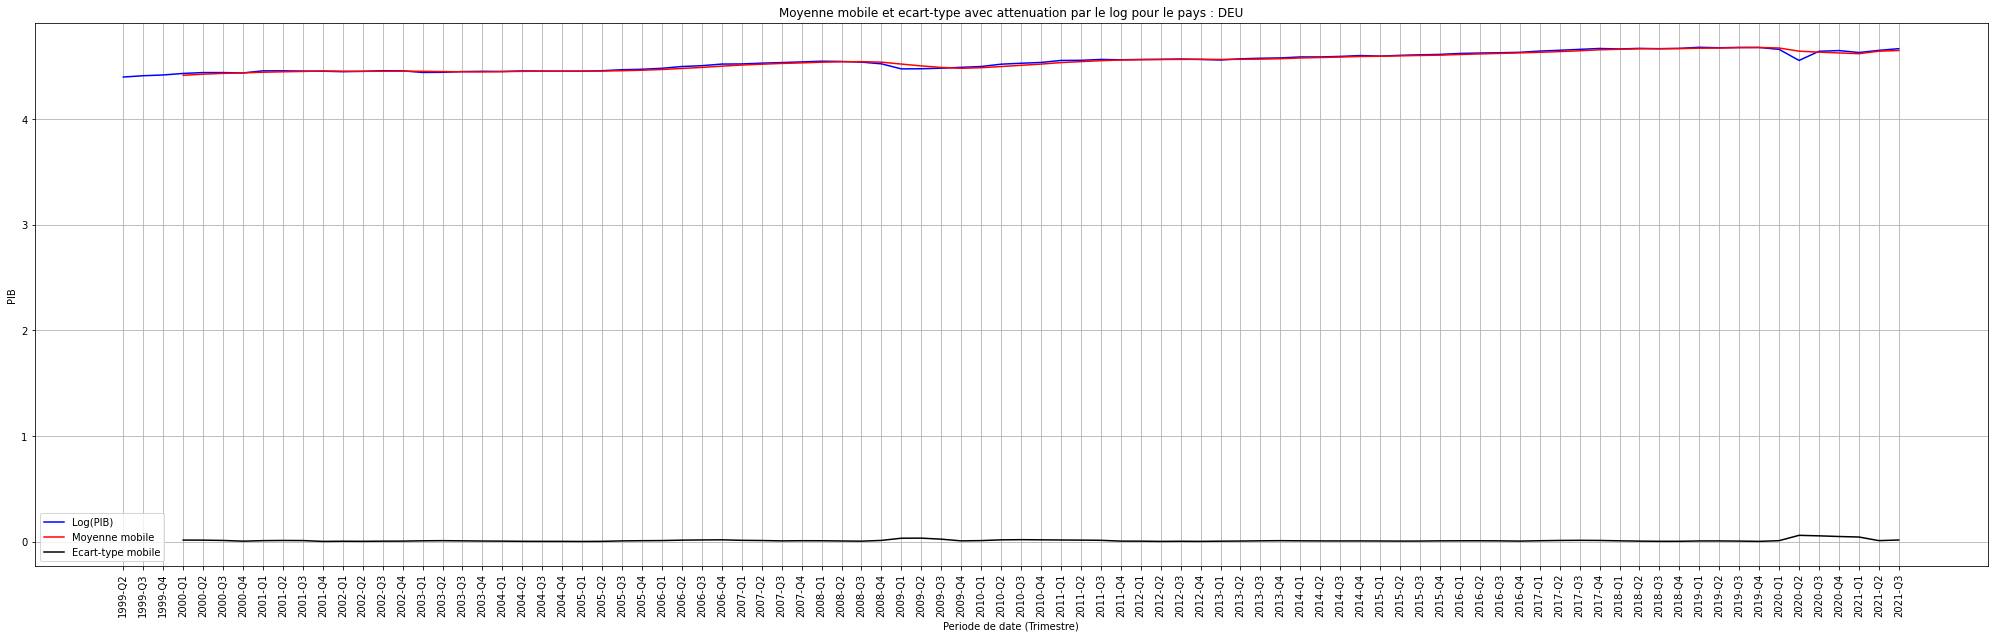

In [ ]:
for country in countries:
  data_log = np.log(data_countries[country]["Value"])

  rolling_mean = data_log.rolling(window = 4).mean()
  rolling_std = data_log.rolling(window = 4).std()

  plt.figure(figsize=(35,10))
  plt.plot(data_countries[country]["TIME"], data_log, color='blue', label='Log(PIB)')
  plt.plot(data_countries[country]["TIME"], rolling_mean, color='red', label='Moyenne mobile')
  plt.plot(data_countries[country]["TIME"], rolling_std, color='black', label='Ecart-type mobile')

  plt.xlabel('Periode de date (Trimestre)')
  plt.ylabel('PIB')
  plt.tick_params(axis ='x', rotation = 90)

  plt.title('Moyenne mobile et ecart-type avec attenuation par le log pour le pays : ' + country)
  plt.legend()
  plt.grid()
  plt.show()

🔰 Nous avons donc une courbe de moyenne mobile beaucoup plus lisse, donc un modèle beaucoup plus stationnaire.

---
### **5️⃣ Fonction d'autocorrelation**

🔰 Nous allons déterminer l'autocorrélation des PIB afin de savoir si notre courbe possède des motifs qui se répètent dans le temps, s'il existe des similarités.

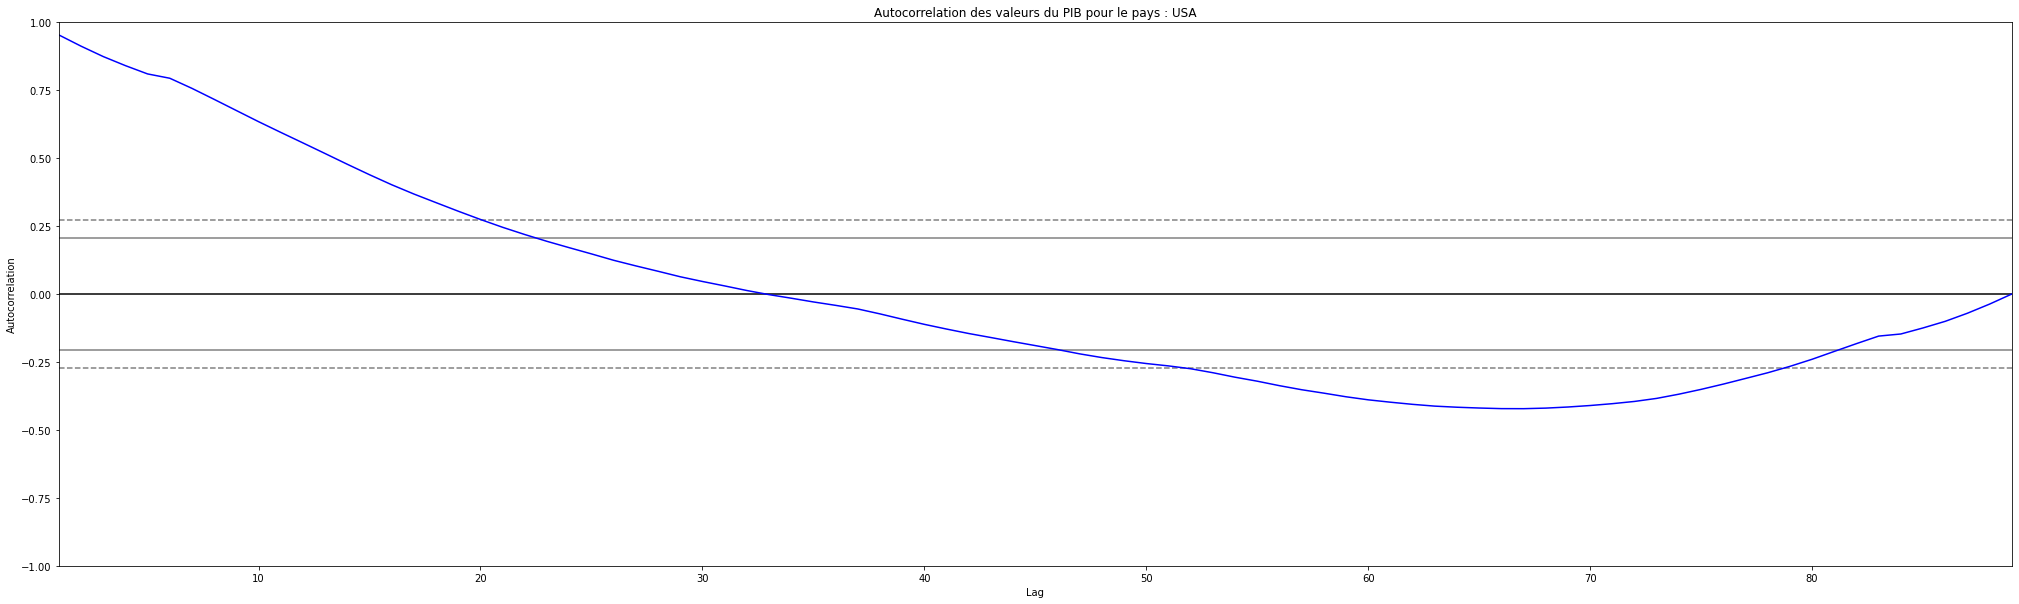

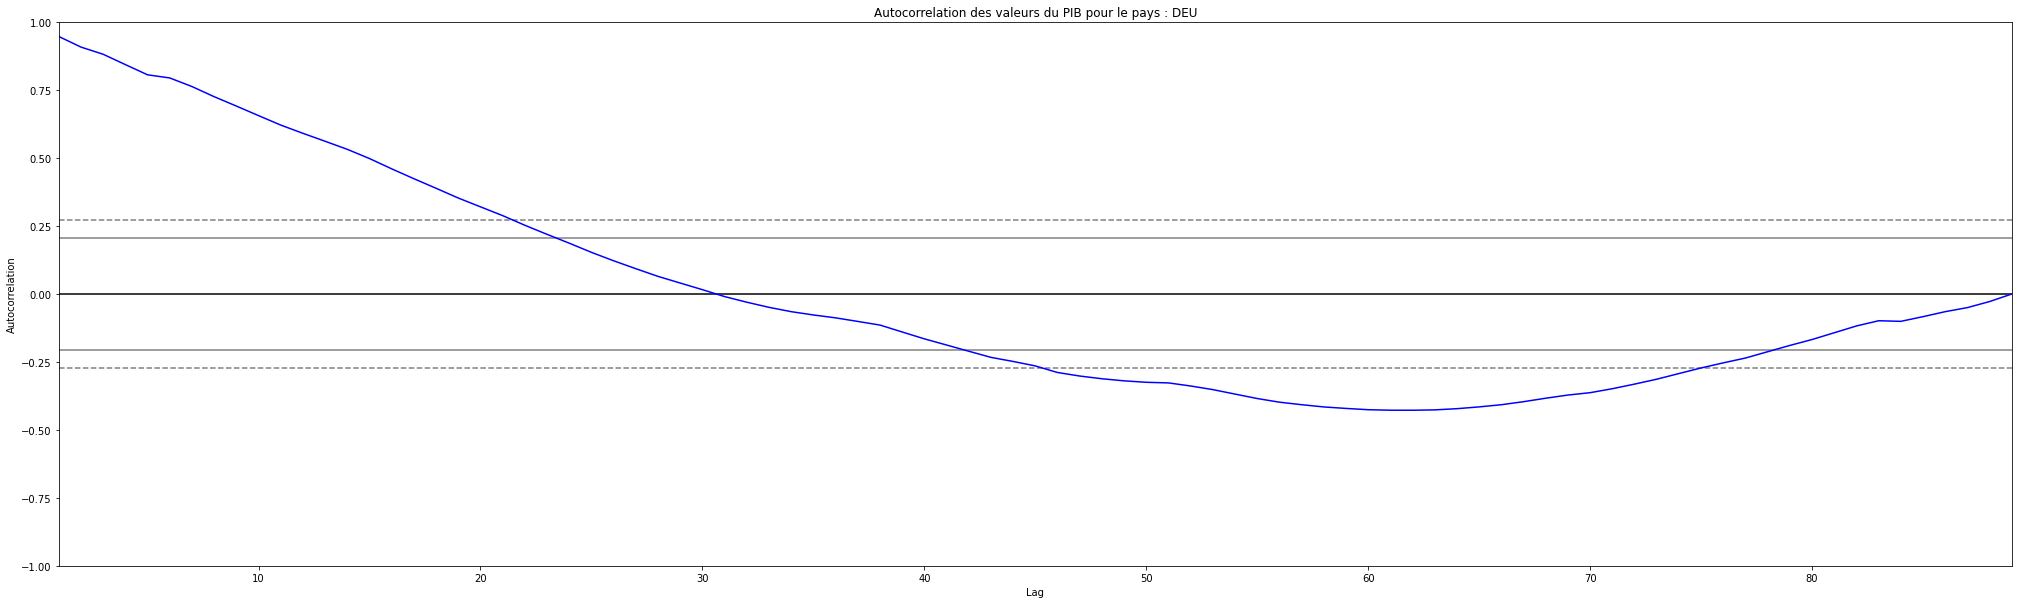

In [ ]:
for country in countries:
  plt.figure(figsize=(35,10))

  data_country = data_countries[country].dropna( how='any', subset=['MoyenneMobile'])
  x = pd.plotting.autocorrelation_plot(data_country["Value"], color="blue")

  plt.title("Autocorrelation des valeurs du PIB pour le pays : " + country)
  plt.grid()
  plt.show()

🔰 Nous pouvons voir qu'au début nous avons une corrélation positive (~=1), résultat qui se retrouve facilement avec car la courbe est presque constante. 

Plus nous avançons dans le temps, moins le processus est corrélé avec lui-même (décroissance de la courbe jusqu'à 0). A l'approche de 0, nous avons un comportement beaucoup plus aléatoire et moins prédictif, on remarque même une période d'autocorrélation négative avant de retrouver un processus très aléatoire et donc difficile à approcher par un modèle.



---
### **6️⃣ Comprendre les variations - Analyse par entropie locale**

🔰 Pour comprendre les variation et pouvoir analyser les événements, il est utilise de tracer les variations, pour avoir une analyse et pouvoir tirer des conclusions sur les événements. 

Nous allons commencer par une analyse par entropie locale. 

Nous allons donc représenter ce modèle, suivant **la modélisation suivante** : 


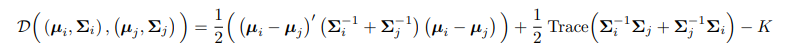

**Sous un intervale** 🔽

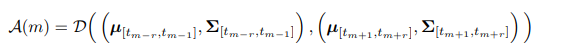

🔰 Pour la simulation, nous allons utiliser les paramètres suivants :      

```
fenetre = 4 #Nombre de trimestre pour la taille de la fenêtre
```

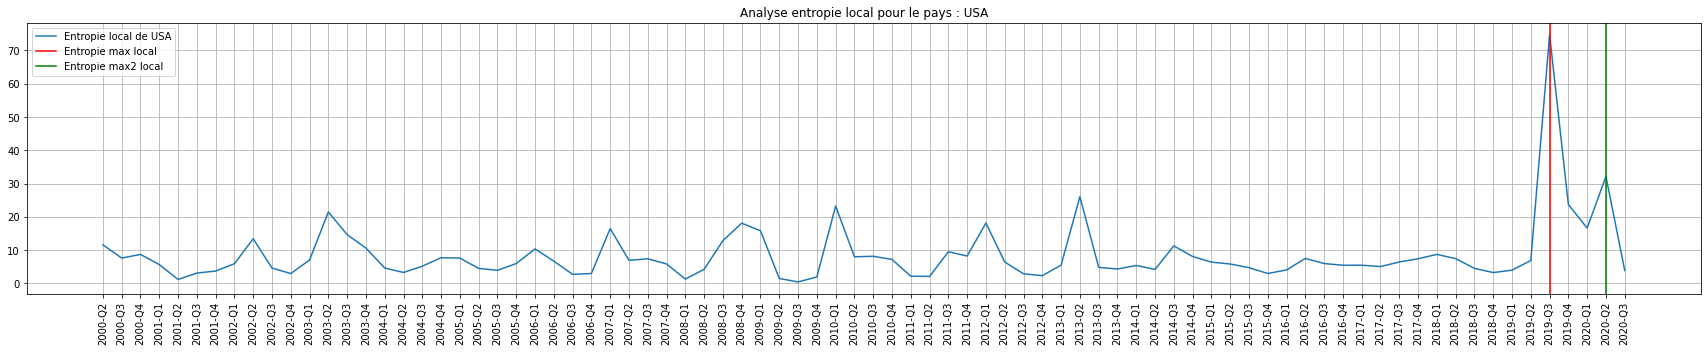

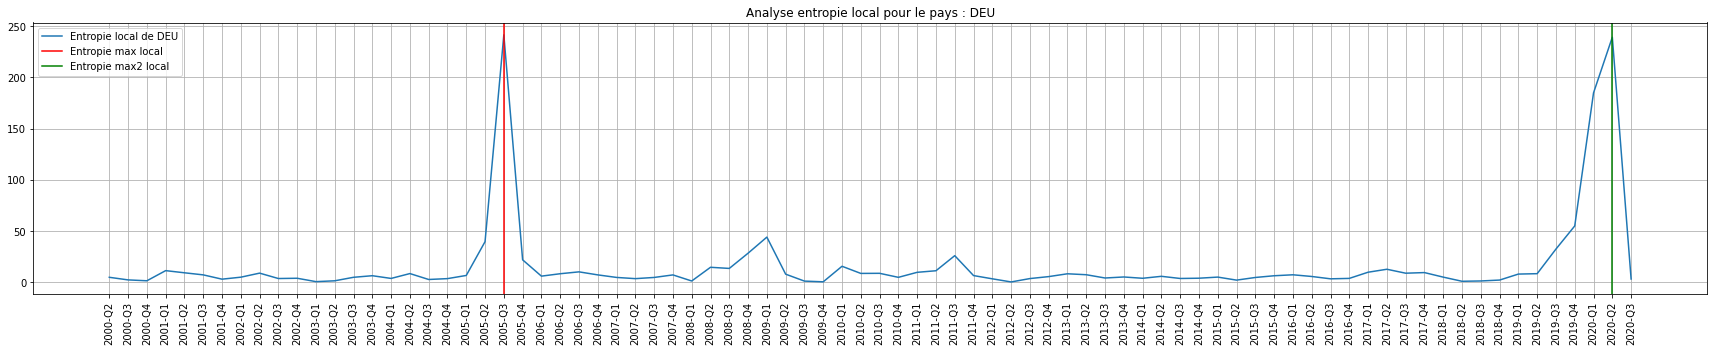

In [ ]:
fenetre = 4

for country in countries:
  data_country = data_countries[country]
  T = len(data_country)

  anneesDivergenceMax = []
  divergences = []

  for j in range(fenetre, T-fenetre, 1):
    mui = np.mean(data_country["Value"][j-fenetre:j-1])
    sii = np.std(data_country["Value"][j-fenetre:j-1])
    muj = np.mean(data_country["Value"][j:j+fenetre])
    sij = np.std(data_country["Value"][j:j+fenetre])

    divergences.append((1/2) * ((mui-muj)**2) * (1/((sii**2)+(sij**2))) + (1/2) * (((sij**2)/(sii**2)) + ((sii**2)/(sij**2))) - 1)

  anneesDivergenceMax.append(divergences.index(max(divergences)) + fenetre)

  plt.figure(figsize=(30,5))
  plt.title(f"Analyse entropie local pour le pays : " + str(country))
  plt.plot(data_country["TIME"][fenetre:T-fenetre], divergences, label="Entropie local de " + country)
  plt.axvline(divergences.index(max(divergences)), color='red', label="Entropie max local")
  divergences.pop(divergences.index(max(divergences)))
  plt.axvline(divergences.index(max(divergences))+1, color='green', label="Entropie max2 local")

  plt.grid()
  plt.tick_params(axis ='x', rotation = 90)
  plt.legend(loc="upper left")
  plt.show()

🔰 Si nous avions des résultats similaire dans la représentation du PIB précédement, nous pouvons voir que la simualtion de variation est différentes. 

Notre visualisation montre deux élements principaux :      

```
🔵 La trace de l'entropie pour l'ensemble de la periode
🔴 L'entropie maximal pour l'ensemble de la période analysé 
🟢 La seconde entropie maximal pour l'ensemble de la periode analysé
```

🔰 Nous allons commencer avec une analyse quantitative pour les Etats Unis. Nous pouvons voir que les deux périodes variations maximales sont sur la periode '2019-Q3' et '2020-Q3'. Periode et variation logiquement en relation avec l'épidemie de COVID-19.

Pour l'analyse de l'Allemagne, nous pouvons avoir des résultats différents. Nous avons deux pics de variations sur des périodes différentes. Une phase importante en 2005 et un deuxième pic en 2020, représentant une nouvelle fois le pic du COVID-19. 


---
### **7️⃣ Comprendre les variations - Analyse par maximum de vraissemblance locale et globale**

🔰 Après une analyse réussit via la méthode d'entropie par méthode locale, nous allons dans un second temps faire une analyse par maximum de vraissemblance. 

Pour tester un maximum de méthode, nous allons faire la représentation par méthode globale et locale. 

Pour rappel, pour faire une analyse par maximum de vraissemblance, nous utilisons la méthode via l'analyse mathématique suivante : 

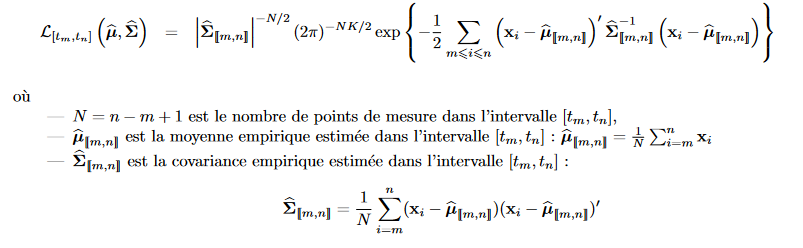

🔰 Avec pour chaque méthode (locale et globale), nous allons utiliser les intervalles suivants :      

**1.   Pour la méthode locale**

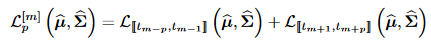


**2.   Pour la méthode globale**

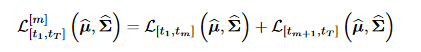

🔰 Pour la simulation, nous allons utiliser les paramètres suivants :      

```
fenetre = 4 #Nombre de trimestre pour la taille de la fenêtre
```

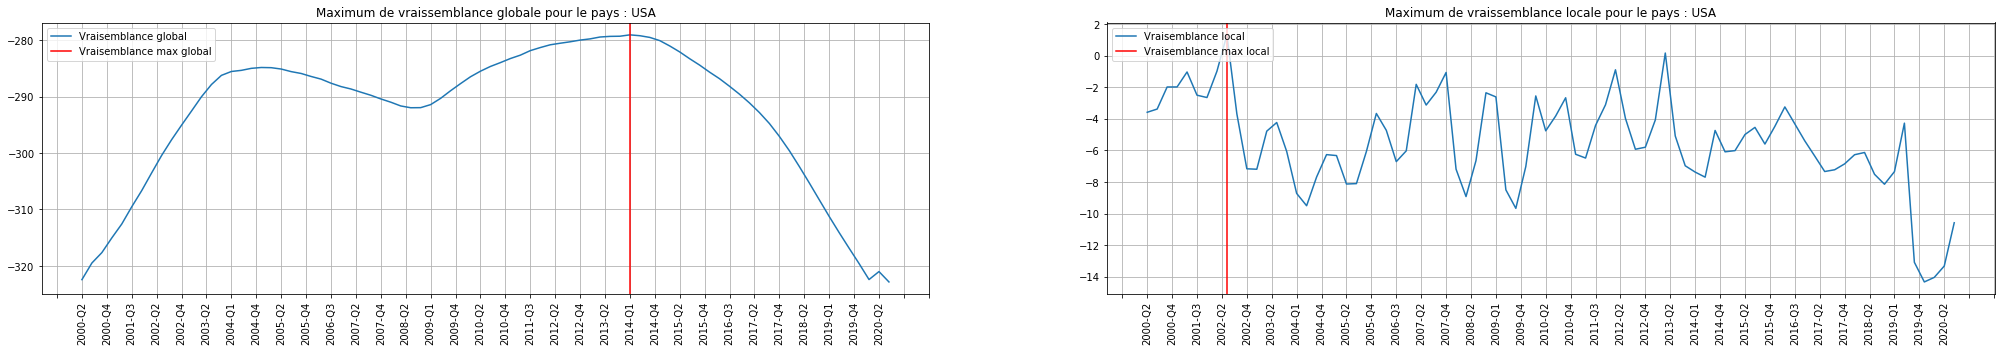

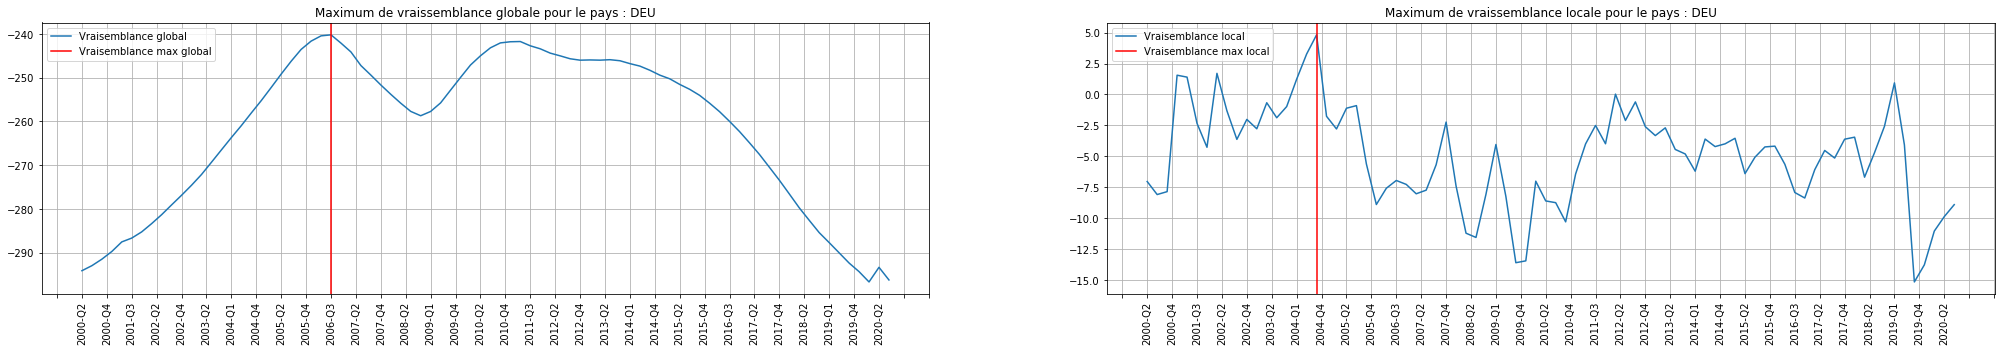

----------------------------
m* global:  29.0
m* local:  21.0


In [ ]:
fenetre = 4

for country in countries:
  data_country = data_countries[country]
  T = len(data_country)
  anneesVraisemblancesMaxGlobal = []
  anneesVraisemblancesMaxLocal = []

  vraisemblancesGlobal = []
  vraisemblancesLocal = []

  for j in range(fenetre, T-fenetre, 1):
    # Global
    siiGlobal = np.std(data_country["Value"][0:j-1])
    sijGlobal = np.std(data_country["Value"][j+1:T])
    N1 = len(data_country[0:j-1])
    N2 = len(data_country[j+1:T])
    vraisemblancesGlobal.append(-(N1/2)*(1+math.log(2*math.pi*(siiGlobal**2))) - (N2/2) * (1+math.log(2*math.pi*(sijGlobal**2))))

    # Local
    siiLocal = np.std(data_country["Value"][j-fenetre:j-1])
    sijLocal = np.std(data_country["Value"][j:j+fenetre])
    N1 = len(data_country[j-fenetre:j-1])
    N2 = len(data_country[j:j+fenetre])
    vraisemblancesLocal.append(-(N1/2)*(1+math.log(2*math.pi*(siiLocal**2))) - (N2/2) * (1+math.log(2*math.pi*(sijLocal**2))))

  anneeVraisemblancesMaxGlobal = vraisemblancesGlobal.index(max(vraisemblancesGlobal))
  anneeVraisemblancesMaxLocal = vraisemblancesLocal.index(max(vraisemblancesLocal))

  anneesVraisemblancesMaxGlobal.append(anneeVraisemblancesMaxGlobal * 1 + fenetre)
  anneesVraisemblancesMaxLocal.append(anneeVraisemblancesMaxLocal * 1 + fenetre)

  plt.figure(figsize=(35,5))

  ax = plt.subplot(1,2,1)
  ax.set_title(f"Maximum de vraissemblance globale pour le pays : " + str(country))
  ax.plot(data_country["TIME"][fenetre:T-fenetre], vraisemblancesGlobal, label="Vraisemblance global")
  ax.axvline(anneeVraisemblancesMaxGlobal, color='red', label="Vraisemblance max global")
  ax.grid()
  ax.legend(loc="upper left")
  ax.tick_params(axis ='x', rotation = 90)
  ax.xaxis.set_major_locator(MaxNLocator(40))

  ax = plt.subplot(1,2,2)
  ax.set_title(f"Maximum de vraissemblance locale pour le pays : " + str(country))
  ax.plot(data_country["TIME"][fenetre:T-fenetre], vraisemblancesLocal, label="Vraisemblance local")
  ax.axvline(anneeVraisemblancesMaxLocal, color='red', label="Vraisemblance max local")
  ax.grid()
  ax.legend(loc="upper left")
  ax.tick_params(axis ='x', rotation = 90)
  ax.xaxis.set_major_locator(MaxNLocator(40))

  plt.subplots_adjust(wspace=0.2)
  plt.show()


print("----------------------------")
print("m* global: ", np.mean(anneesVraisemblancesMaxGlobal))
print("m* local: ", np.mean(anneesVraisemblancesMaxLocal))


🔰 Pour l'analyse par maximum de vraissemblance locale et globale, nous pouvons voir que le résultat ne sont pas cohérent avec les données.

Nous avons des données incohérentes qui ne correspondent pas aux attentes. 

Globalement, nous pouvons dire que l'analyse par maximum de vraissemblance n'est pas adapté à notre jeu de données. 

Ceci, peut importe la fenêtre de l'intervalle dans la méthode locale.

---
### **8️⃣ Prédiction linéaire avec le modèle de persistance**



Disons que nous voulons développer un modèle qui prédit l'évolution du PIB dans un certain nombre d'années en ayant connaissance de toutes les données précédentes. Le modèle le plus simple consisterait à utiliser les dernières observations afin de façonner les futures données sur ces observations. Pour ce premier modèle, on sépare les observations passées en 2 sets : un set d'entrainement 'train' et un set de test 'test'. On entraine un modèle sur le set 'train' et c'est grâce à ce modèle que nous allons prédire.

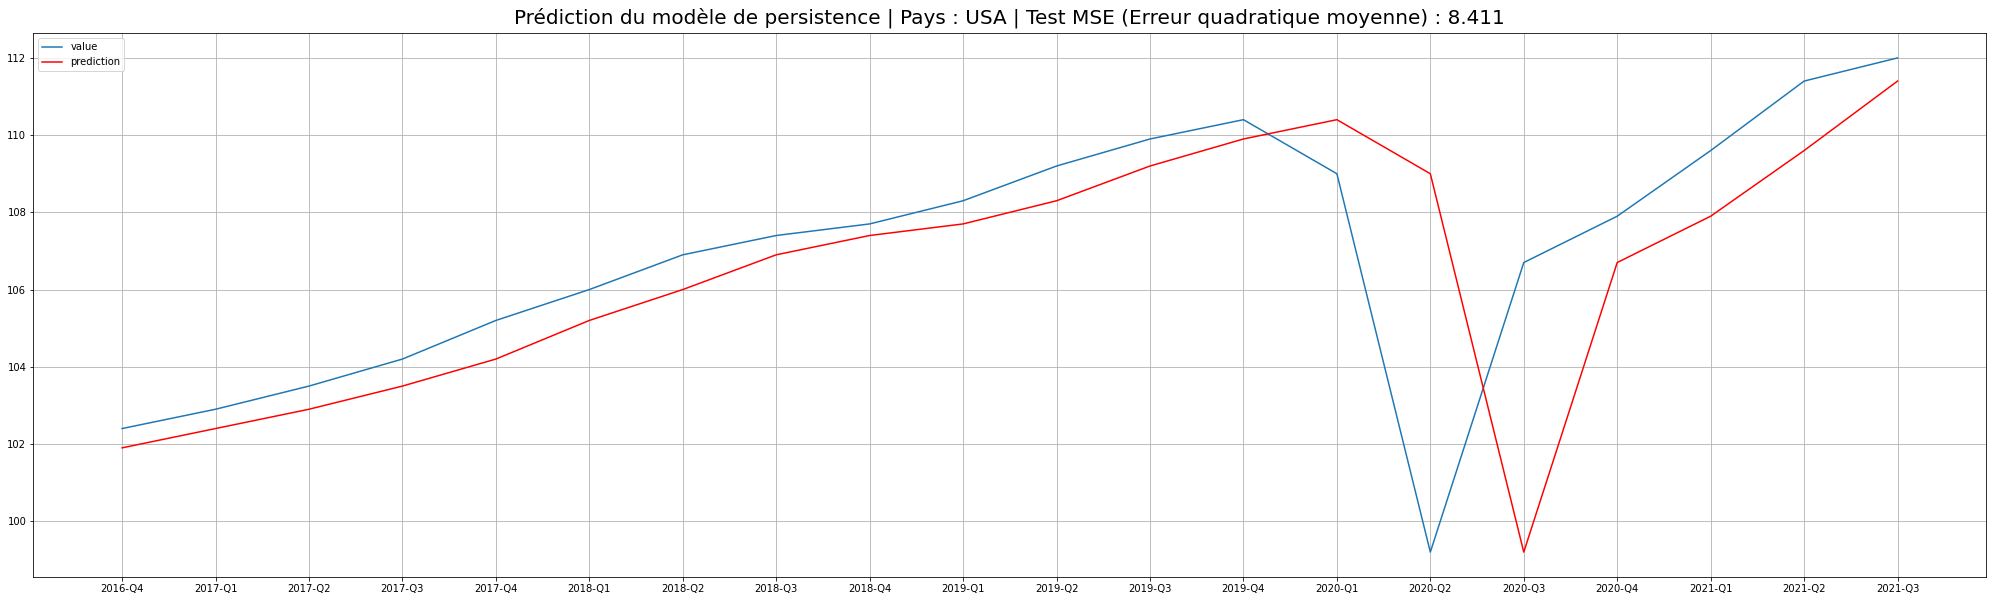

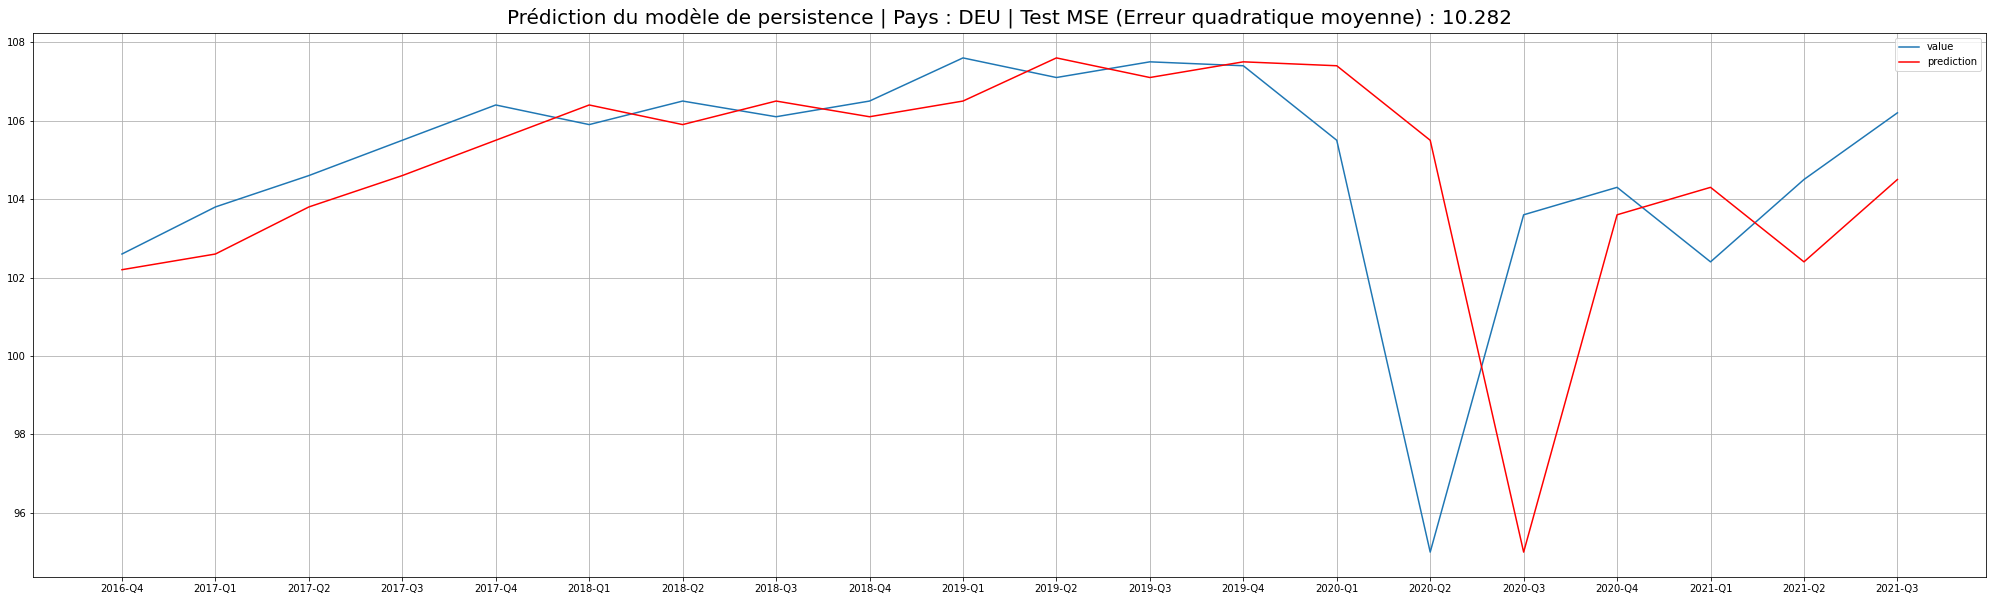

In [ ]:
nbYearsTest = 5

for country in countries:
  data_country = data_countries[country].dropna( how='any', subset=['Value'])
  value=data_country["Value"]
  dataframe = pd.concat([value.shift(1), value], axis=1)
  dataframe.columns = ['t-1', 't+1']
  
  # split into train and test sets
  X = dataframe.values
  train, test = X[1:len(value)-nbYearsTest*4], X[len(value)-nbYearsTest*4:]
  train_X, train_y = train[:,0], train[:,1]
  test_X, test_y = test[:,0], test[:,1]

  # walk-forward validation
  predictions = test_X
  test_score = mean_squared_error(test_y, predictions)

  # plot predictions vs expected
  plt.figure(figsize=(35,10))
  
  plt.plot(data_country["TIME"][len(value)-nbYearsTest*4:], test_y, label="value")
  plt.plot(data_country["TIME"][len(value)-nbYearsTest*4:], predictions, color='red', label="prediction")

  plt.title("Prédiction du modèle de persistence | Pays : " + country + " | Test MSE (Erreur quadratique moyenne) : " + str(round(test_score, 3)), fontsize=20, pad=10)
  plt.legend()
  plt.grid()
  plt.show()

---
### **9️⃣ Prédiction avec un modèle AR fixe**

Un deuxième modèle de prédiction utilise l'autorégressif : c'est un modèle linéaire qui utilise une fenetre de données afin d'approximer un modèle autorégressif d'un certain ordre 'lags'. C'est ce modèle qui constitue notre modèle prédictif.

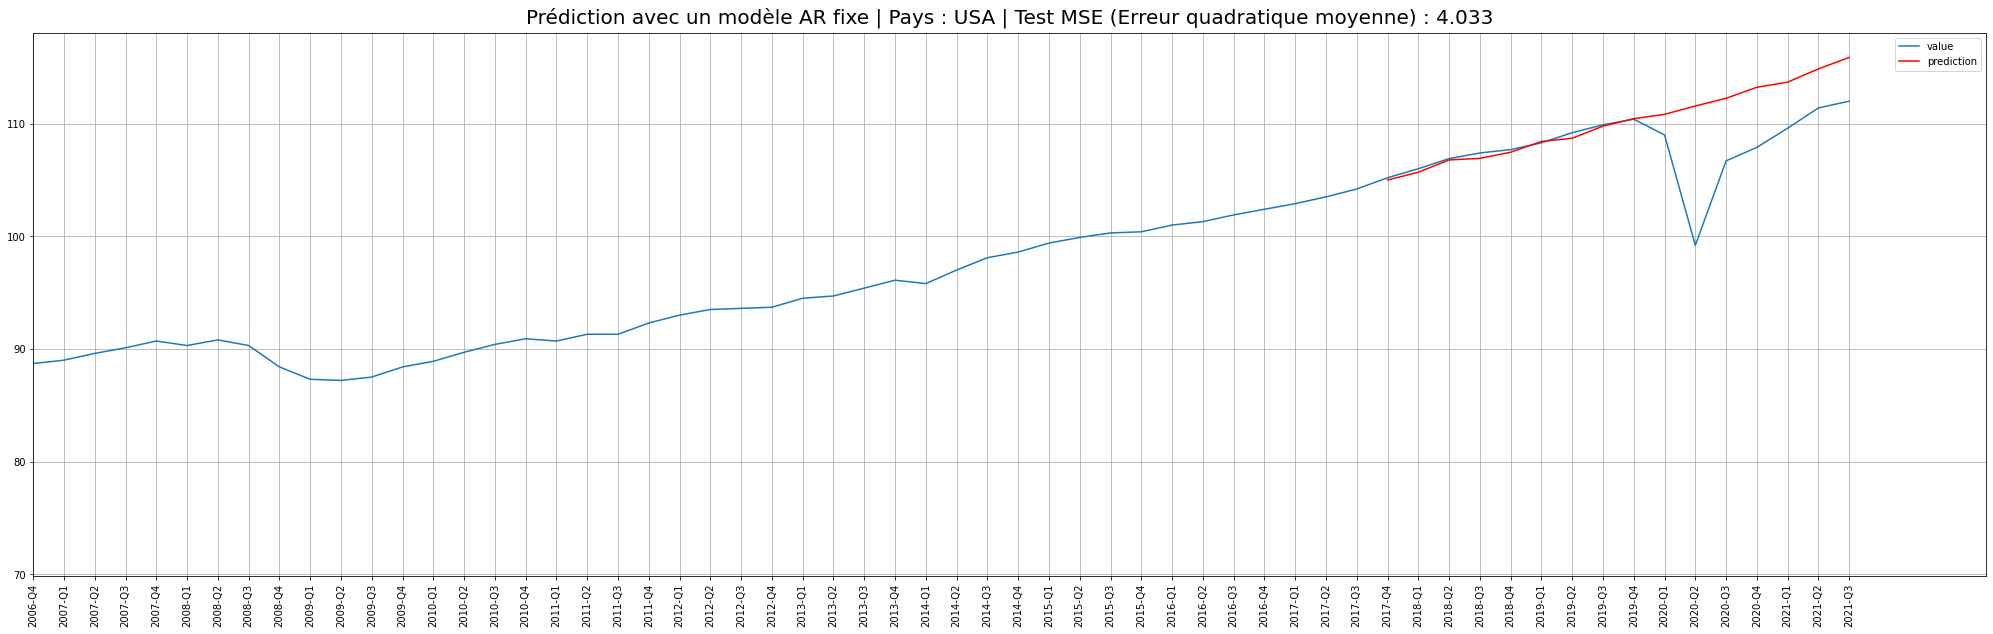

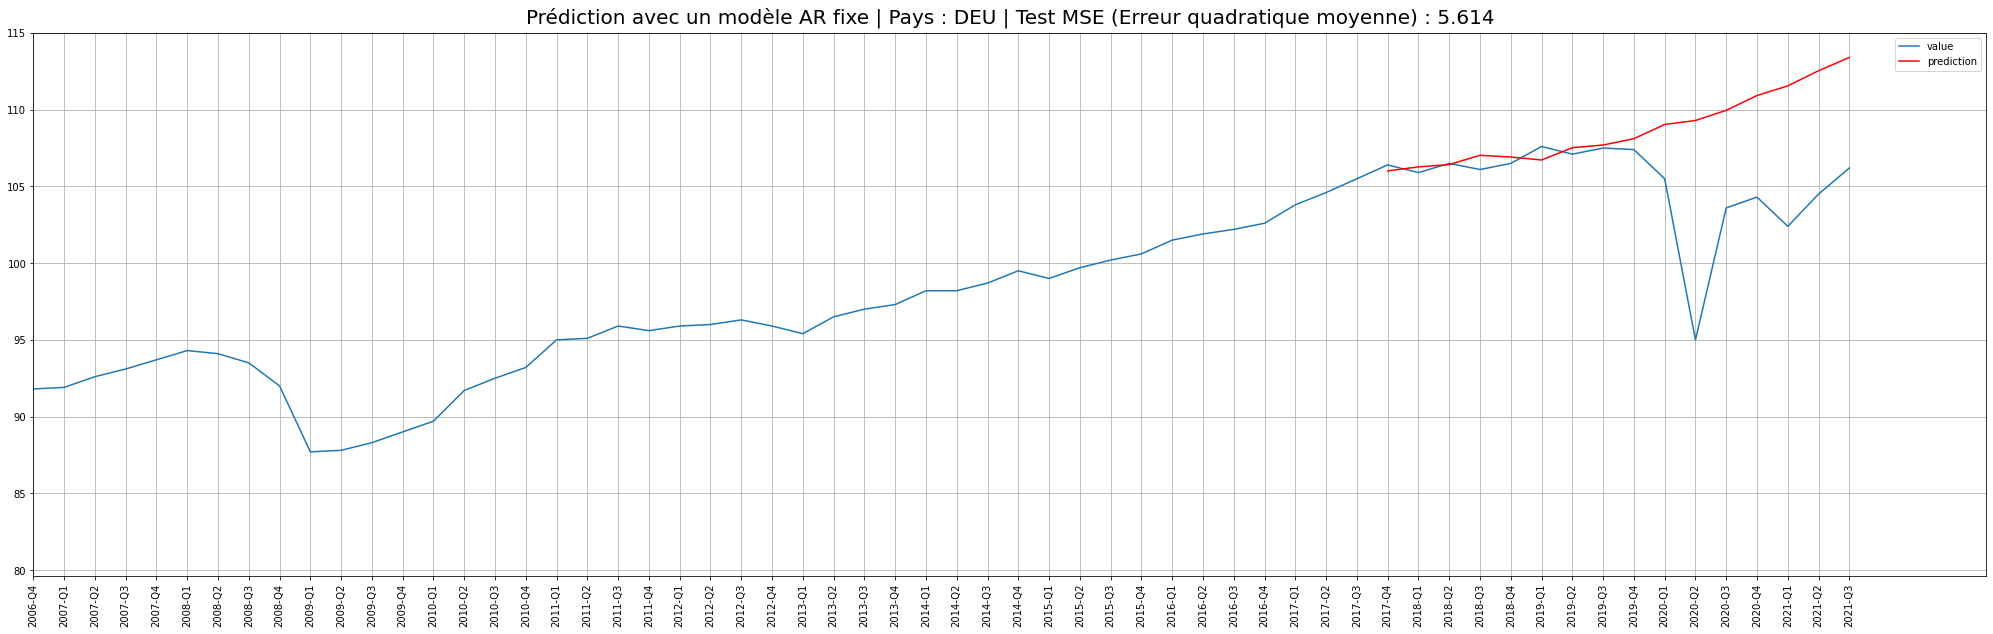

In [ ]:
nbYearsDisplay = 15
nbYearsTest = 4
lags = 29

for country in countries:

  # Fixed AR model
  data_country = data_countries[country].dropna( how='any', subset=['Value'])
  X = data_country["Value"].values
  train, test = X[1:len(X)-nbYearsTest*4], X[len(X)-nbYearsTest*4:]

  # train autoregression
  model = AutoReg(train, lags=lags)
  model_fit = model.fit()

  # make predictions
  predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
  rmse = math.sqrt(mean_squared_error(test, predictions))

  # plot predictions vs expected
  plt.figure(figsize=(35,10))

  plt.plot(data_country["TIME"], data_country["Value"], label="value")
  plt.plot(data_country["TIME"], [*[None]*(len(X)-nbYearsTest*4),*predictions], color='red', label="prediction")

  plt.title("Prédiction avec un modèle AR fixe | Pays : " + country + " | Test MSE (Erreur quadratique moyenne) : " + str(round(rmse, 3)), fontsize=20, pad=10)
  plt.legend()
  plt.grid()
  plt.tick_params(axis ='x', rotation = 90)
  if (nbYearsDisplay): plt.xlim(len(X)-nbYearsDisplay*4)
  plt.show()

---
### **1️⃣0️⃣ Prédiction avec un modèle AR mobile**

On peut également ajouter une variation dans la conception de notre modèle prédictif : au lieu d'avoir un modèle autorégressif fixe, on recalcule les coefficients à chaque fois.

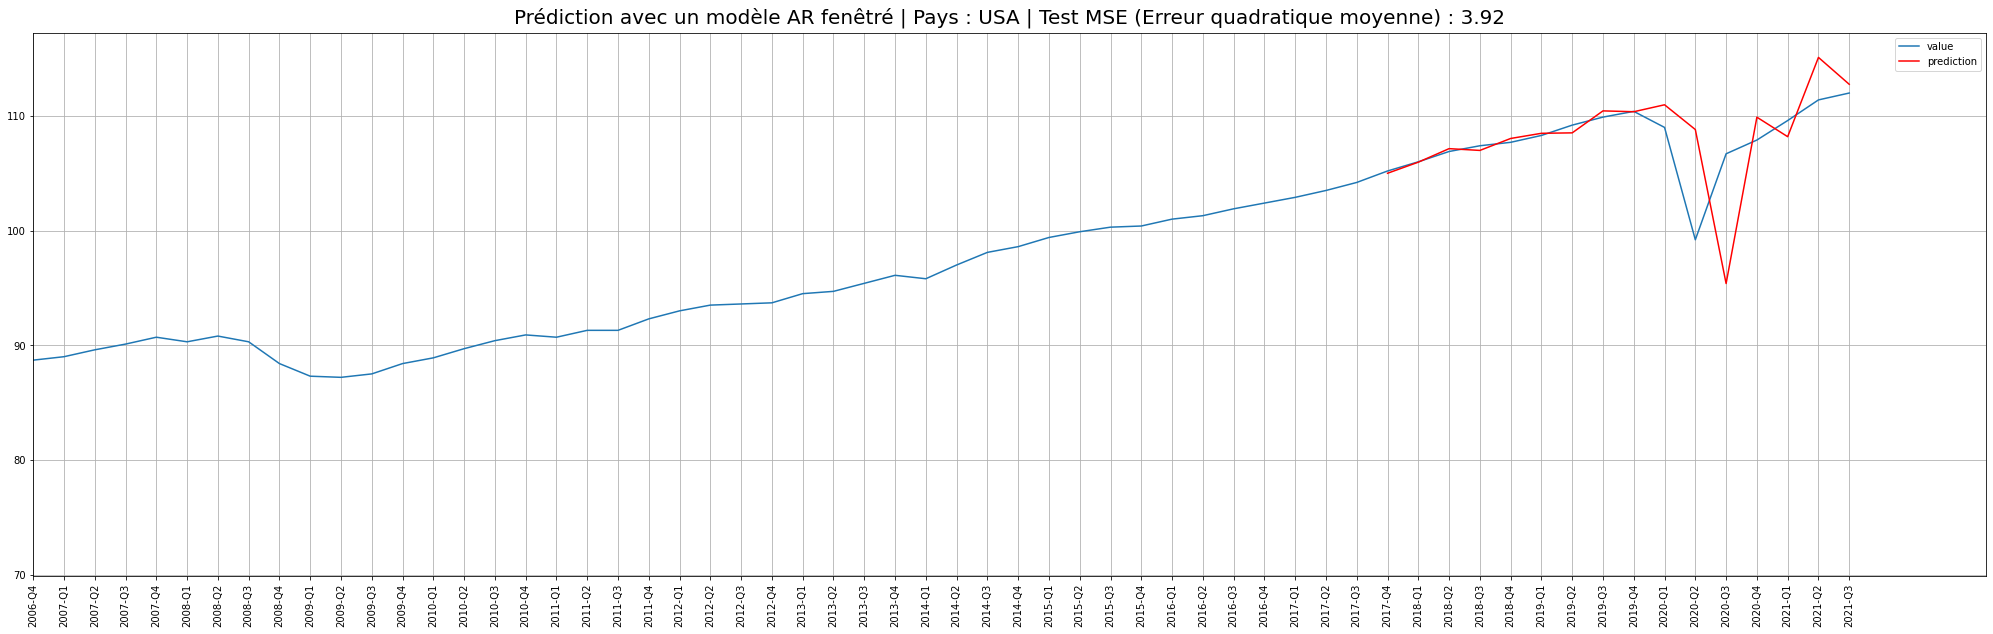

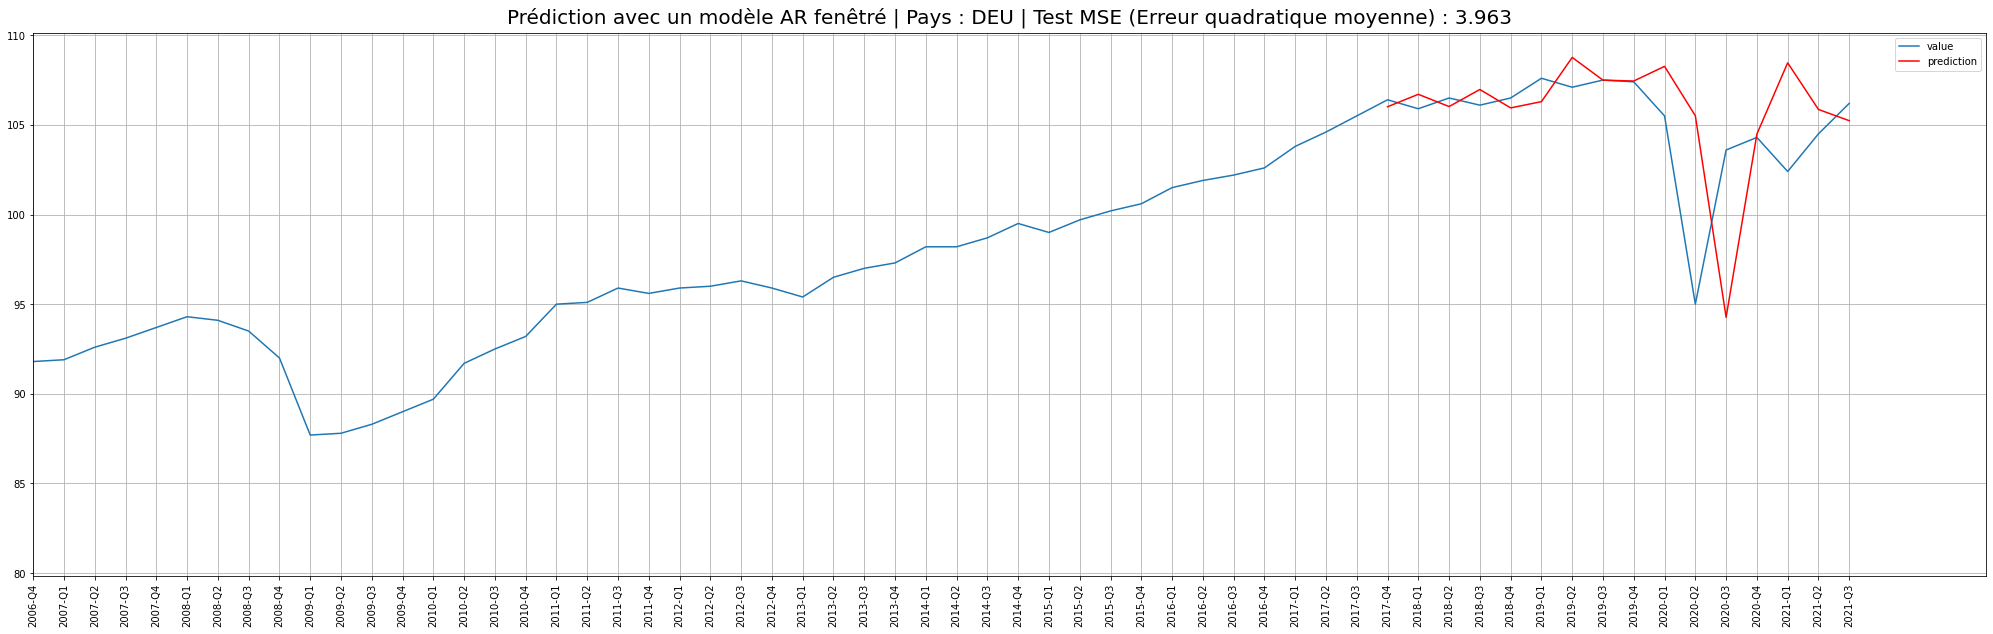

In [ ]:
nbYearsDisplay = 15
nbYearsTest = 4
fenetre = 29
lags = 29

for country in countries:
  # Rolling AR model
  data_country = data_countries[country].dropna( how='any', subset=['Value'])
  X = data_country["Value"].values
  train, test = X[1:len(X)-nbYearsTest*4], X[len(X)-nbYearsTest*4:]

  # train autoregression
  window = fenetre
  model = AutoReg(train, lags=lags)
  model_fit = model.fit()
  coef = model_fit.params

  # walk forward over time steps in test
  history = train[len(train)-window:]
  history = [history[i] for i in range(len(history))]
  predictions = list()
  for t in range(len(test)):
      length = len(history)
      lag = [history[i] for i in range(length-window,length)]
      yhat = coef[0]
      for d in range(window):
          yhat += coef[d+1] * lag[window-d-1]
      obs = test[t]
      predictions.append(yhat)
      history.append(obs)
      
  rmse = math.sqrt(mean_squared_error(test, predictions))

  # plot predictions vs expected
  plt.figure(figsize=(35,10))

  plt.plot(data_country["TIME"], data_country["Value"], label="value")
  plt.plot(data_country["TIME"], [*[None]*(len(X)-nbYearsTest*4),*predictions], color='red', label="prediction")

  plt.title("Prédiction avec un modèle AR fenêtré | Pays : " + country + " | Test MSE (Erreur quadratique moyenne) : " + str(round(rmse, 3)), fontsize=20, pad=10)
  plt.legend()
  plt.grid()
  plt.tick_params(axis ='x', rotation = 90)
  if (nbYearsDisplay): plt.xlim(len(X)-nbYearsDisplay*4)
  plt.show()

---
### **1️⃣1️⃣ Prédiction avec ARIMA**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=320.465, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=318.581, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=317.888, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=326.828, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=319.170, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=327.991, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.840 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -155.944
Date:                Wed, 12 Jan 2022   AIC                            317.888
Time:                        08:32:16   BIC         

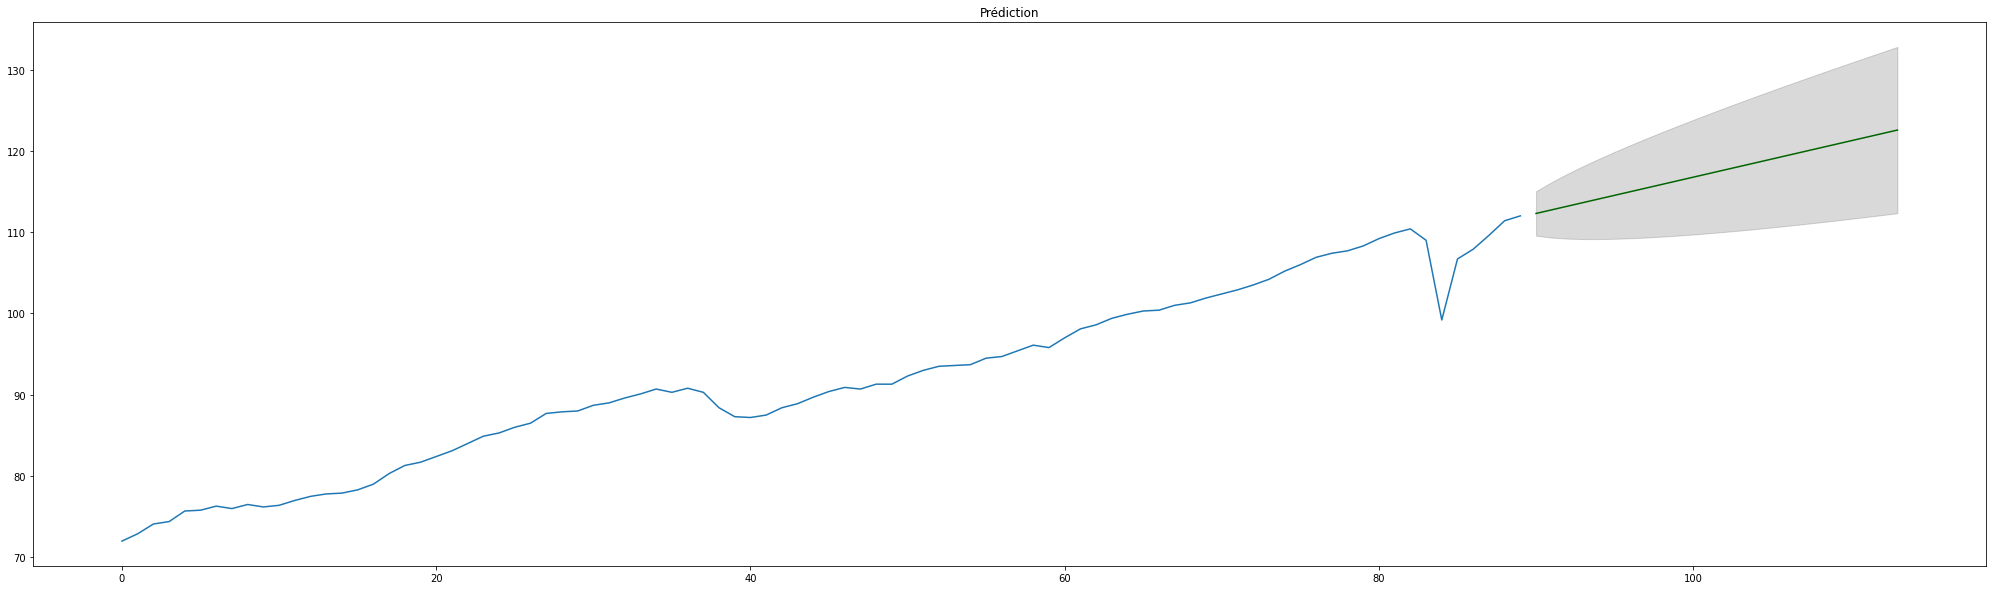

In [ ]:
'''
trouver p d et q automatiquement
'''
df = data_countries["USA"]["Value"]

model = pm.auto_arima(df.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

'''
go forecast
'''
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(35,10))
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prédiction")
plt.show()